In [305]:
from keras.datasets import fashion_mnist
(X_train, Y_train),(X_test,Y_test)= fashion_mnist.load_data()

In [306]:
import numpy as np
print(X_train.shape,Y_train.shape)

print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [307]:
classes=np.unique(Y_train)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Text(0.5, 1.0, 'Ground Truth: 9')

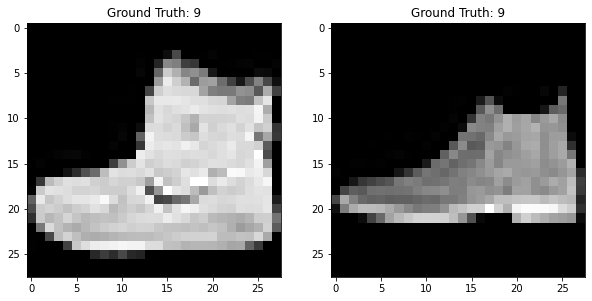

In [308]:
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap="gray")
plt.title("Ground Truth: {}".format(Y_train[0]))

plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap="gray")
plt.title("Ground Truth: {}".format(Y_test[0]))


In [309]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [310]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.


In [311]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(Y_train)
test_Y_one_hot = to_categorical(Y_test)

print(Y_train[0],test_Y_one_hot[0])

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [312]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, train_Y_one_hot, test_size=0.2, random_state=13)


In [313]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [314]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization,LeakyReLU


In [315]:
num_classes=10
epochs=2
batch_size=64

In [316]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation="linear", input_shape=(28,28,1), padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding="same"))
model.add(Conv2D(64,(3,3),activation="linear", padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(128,(3,3),activation="linear", padding="same"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(128, activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation="softmax"))


In [317]:
model.compile(loss=keras.losses.categorical_crossentropy , optimizer=keras.optimizers.Adam(), metrics=['Accuracy'])

In [319]:
fashion_model=model.fit(X_train,Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/2
750/750 [==============================] - 41s 55ms/step - loss: 0.2697 - Accuracy: 0.9013 - val_loss: 0.2624 - val_Accuracy: 0.9072
Epoch 2/2
750/750 [==============================] - 45s 60ms/step - loss: 0.2294 - Accuracy: 0.9155 - val_loss: 0.2464 - val_Accuracy: 0.9097


In [322]:
test_eval=model.evaluate(X_test, Y_test, verbose=0)

In [323]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.24638517200946808
Test accuracy: 0.9096666574478149


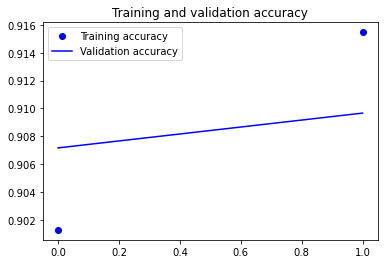

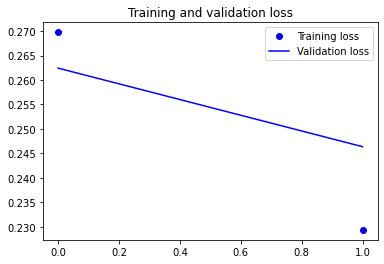

In [329]:
accuracy = fashion_model.history['Accuracy']
val_accuracy = fashion_model.history['val_Accuracy']
loss = fashion_model.history['loss']
val_loss = fashion_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [331]:
predicted_classes = model.predict(X_test)


375/375 [==============================] - 5s 14ms/step
